#인공지능 과제 #3

##2018114693 우승택

### 코드수정 과제

In [167]:
import sklearn
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, validation_curve
import numpy as np
import matplotlib.pyplot as plt
import time

In [168]:
digit = datasets.load_digits()
input_train, input_test, target_train, target_test = train_test_split(digit.data, digit.target, train_size = 0.6, stratify= digit.target)
print(input_train.shape, target_train.shape)
print(input_test.shape, target_test.shape)

(1078, 64) (1078,)
(719, 64) (719,)


In [169]:
start = time.time()
mlp = MLPClassifier(learning_rate_init=0.001, batch_size = 32, max_iter = 50, solver = 'sgd')
prange = range(20, 81, 10)
train_score, test_score = validation_curve(mlp, input_train, target_train, param_name = "hidden_layer_sizes", param_range = prange, cv = 5, scoring = 'accuracy', n_jobs = -1, verbose = True)
end = time.time()
print(f"하이퍼 매개변수 최적화에 걸린 시간은 {end - start}초입니다.")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


하이퍼 매개변수 최적화에 걸린 시간은 17.53948950767517초입니다.


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   17.5s finished


In [170]:
train_mean = np.mean(train_score, axis = 1)
train_std = np.std(train_score, axis = 1)
test_mean = np.mean(test_score, axis = 1)
test_std = np.std(test_score, axis = 1)

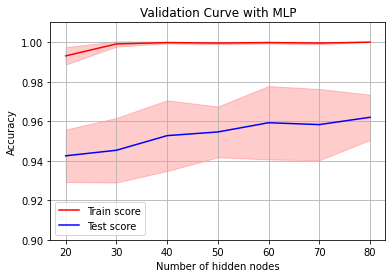

In [171]:
plt.plot(prange, train_mean, label="Train score", color = 'r')
plt.plot(prange, test_mean, label="Test score", color='b')
plt.fill_between(prange, train_mean - train_std, train_mean + train_std, alpha = 0.2, color = 'r')
plt.fill_between(prange, test_mean - test_std, test_mean + test_std, alpha = 0.2, color = 'r')
plt.legend(loc = 'best')
plt.title("Validation Curve with MLP")
plt.xlabel("Number of hidden nodes")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.01)
plt.grid(axis = 'both')
plt.show()

In [172]:
best_number_nodes = prange[np.argmax(test_mean)]
print(f"\n최적의 은닉충의 노드 개수는 {best_number_nodes}개입니다.\n")


최적의 은닉충의 노드 개수는 80개입니다.



In [173]:
mlp_test = MLPClassifier(hidden_layer_sizes = (best_number_nodes), learning_rate_init = 0.001, batch_size = 32, max_iter = 300, solver = 'sgd')
mlp_test.fit(input_train, target_train)

MLPClassifier(batch_size=32, hidden_layer_sizes=80, max_iter=300, solver='sgd')

In [174]:
res = mlp_test.predict(input_test)

In [175]:
conf = np.zeros((10, 10))
for i in range(len(res)):
  conf[res[i]][target_test[i]] += 1
print(conf)

[[71.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0. 70.  0.  0.  0.  0.  1.  0.  5.  0.]
 [ 0.  0. 71.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0. 68.  0.  0.  0.  0.  0.  3.]
 [ 0.  0.  0.  0. 70.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  2.  0. 71.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  0.  0. 70.  0.  0.  0.]
 [ 0.  0.  0.  0.  2.  0.  0. 72.  0.  0.]
 [ 0.  2.  0.  1.  0.  0.  0.  0. 63.  1.]
 [ 0.  0.  0.  2.  0.  1.  0.  0.  1. 67.]]


In [176]:
no_correct = 0
for i in range(10):
  no_correct += conf[i][i]
accuracy = no_correct / len(res)
print(f"테스트 집합에 대한 정확률은 {accuracy * 100}입니다.")

테스트 집합에 대한 정확률은 96.38386648122392입니다.


### 가중치 시각화 코드 과제

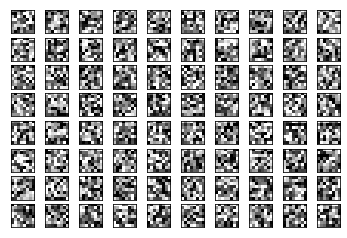

In [177]:
row = int(best_number_nodes / 10)
col = 10
fig, axes = plt.subplots(row, col)

vmin, vmax = mlp_test.coefs_[0].min(), mlp_test.coefs_[0].max()
for coef, ax in zip(mlp_test.coefs_[0].T, axes.ravel()):
  ax.matshow(coef.reshape(8, 8),
             cmap = plt.cm.gray, vmin = 0.5 * vmin, vmax = 0.5 * vmax)
  ax.set_xticks(())
  ax.set_yticks(())

plt.show()

### 라이브러리 버전

In [178]:
print(np.__version__)
print(sklearn.__version__)

1.21.5
1.0.2
